# Exploratory Data Analysis: A Complete Guide to Understanding Data

In this notebook, we will explore Exploratory Data Analysis (EDA), walking through the complete data science pipeline from raw data to model-ready features.

#### Outline:

1. Intro to EDA
2. Dataset Overview
3. Data Exploration: *Understanding What We Have*
4. Data Cleaning: *Fixing the Problems*
5. Data Analysis: *Discovering Hidden Patterns*
6. Feature Engineering: *Creating Better Variables*

## 1. What is Exploratory Data Analysis?

Imagine you're a *detective who just arrived at a crime scene*. Before you start making conclusions about what happened, you'd want to carefully examine all the evidence, understand the layout of the room, and look for any unusual patterns or clues. That's exactly what Exploratory Data Analysis (EDA) does for data scientists!

EDA is like *being a data detective*. It's the process of examining and understanding the dataset before we start building any models or making predictions. Just like a detective wouldn't make arrests without investigating first, a data scientist shouldn't build models without thoroughly exploring their data.

**The Complete EDA Process:**

We can think of EDA as a journey with four main stops:

1. **Data Exploration**: *What do we have?*
    - Understanding the structure and basic characteristics
2. **Data Cleaning**: *What needs fixing?*
    - Handling missing values, duplicates, inconsistencies and errors  
3. **Data Analysis**: *What patterns exist?*
    - Discovering relationships and distributions
4. **Feature Engineering**: *How can we improve?*
    - Creating new features for better insights

## 2. Dataset Overview

For this comprehensive EDA, we'll use one of the most common and popular datasets in data science: **Titanic dataset**. This dataset contains information about the passengers aboard the Titanic, including whether they survived the tragic sinking in 1912.

**Importing Libraries and Loading Dataset**

We'll start by importing the necessary libraries and loading our dataset.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = sns.load_dataset("titanic")

## 3. Data Exploration: *Understanding What We Have*

The first step in our EDA journey is to understand the basic structure and characteristics of our dataset.

**Dataset Overview:** We can quickly take a look at our data using `.shape` and `.head()` methods.

In [2]:
print(f"Dataset shape: {data.shape}")

print("\n--- FIRST FEW ROWS OF THE DATA ---")
data.head()

Dataset shape: (891, 15)

--- FIRST FEW ROWS OF THE DATA ---


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


**Understanding the Features:** Let's decode what each column represents:

In [3]:
column_meanings = {
    'survived': 'Target variable (0 = No, 1 = Yes)',
    'pclass': 'Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)',
    'sex': 'Gender (male/female)',
    'age': 'Age in years',
    'sibsp': 'Number of siblings/spouses aboard',
    'parch': 'Number of parents/children aboard',
    'fare': 'Passenger fare',
    'embarked': 'Port of embarkation (C=Cherbourg, Q=Queenstown, S=Southampton)',
    'class': 'Ticket class (First, Second, Third)',
    'who': 'Person category (man, woman, child)',
    'adult_male': 'Boolean indicating if adult male',
    'deck': 'Deck level',
    'embark_town': 'Full embarkation port name',
    'alive': 'Survival status (yes/no)',
    'alone': 'Boolean indicating if traveling alone'
}

print("\n--- COLUMN MEANINGS ---")
for col, meaning in column_meanings.items():
    print(f"{col}: {meaning}")


--- COLUMN MEANINGS ---
survived: Target variable (0 = No, 1 = Yes)
pclass: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
sex: Gender (male/female)
age: Age in years
sibsp: Number of siblings/spouses aboard
parch: Number of parents/children aboard
fare: Passenger fare
embarked: Port of embarkation (C=Cherbourg, Q=Queenstown, S=Southampton)
class: Ticket class (First, Second, Third)
who: Person category (man, woman, child)
adult_male: Boolean indicating if adult male
deck: Deck level
embark_town: Full embarkation port name
alive: Survival status (yes/no)
alone: Boolean indicating if traveling alone


We can see several instances of redundant information across multiple columns, which will need to be addressed in the data cleaning phase. Here are some examples:
- **pclass** and **class** - Both represent ticket class, just in different formats (numeric vs. text)
- **survived** and **alive** - Both indicate survival status (0/1 vs. no/yes)
- **embarked** and **embark_town** - Both show embarkation port (abbreviated vs. full name)

These redundancies present opportunities to reduce dataset dimensionality without information loss.

**Dataset Structure:** The `.info()` method gives us a concise summary of the entire dataset, including column names, count of non-null entries and data types of each column.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


From this initial exploration, we can see our dataset has 891 rows and 15 columns. We have both numerical columns (age, fare) and categorical columns (sex, class, embark_town).

**Descriptive Statistics:** The `.describe()` method provides key statistical summary for numerical columns:

- **Count**: How many non-missing values we have
- **Mean**: The average value
- **Standard deviation**: How spread out the values are
- **Min/Max**: The range of our data
- **25%, 50%, 75%**: Quartiles that show data distribution

In [5]:
print("\n--- DESCRIPTIVE STATISTICS ---")
print(data.describe())


--- DESCRIPTIVE STATISTICS ---
         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


**Key Insights:**
 - **Survival rate**: About 38% of passengers survived (mean of 0.38)
 - **Age range**: From less than 1 year to 80 years old, with average around 30
 - **Fare range**: From free to over $500, with high variation (std = 49.69)
 - **Class distribution**: Majority of passengers traveled in 2nd and 3rd class (mean of 2.30)
 - **Family size**: Most passengers traveled with 0-1 family members

## 4. Data Cleaning: *Fixing the Problems*

Now that we know what problems exist in our data, it's time to *clean up our data* and we need to be thoughtful about how we handle each issue.

It is an important process to ensure that our data is accurate, consistent, and suitable for further analysis. Otherwise, it can lead to producing unreliable insights and misleading conclusions. Some of the tasks includes:
- **Removing duplicates** - Prevents skewed analysis from repeated observations
- **Handling missing values** - Addresses gaps to ensure data completeness
- **Converting data types** - Ensures variables are in appropriate formats for analysis (e.g., dates as datetime objects, categories as categorical data)
- **Handling outliers** - Manages extreme values that might distort statistical measures or model performance

**Removing Duplicates:** We can use `.duplicated().sum()` method to check for duplicate rows to ensure that each row is unique and to avoid any redundancy in the dataset, we will use `.drop_duplicates()` to drop them.


In [6]:
# Let's create a copy of our data for cleaning
data_cleaned = data.copy()

# Check for duplicate records
print(f"Number of duplicate records: {data_cleaned.duplicated().sum()}")

# Remove duplicate records
data_cleaned = data_cleaned.drop_duplicates()
print(f"Duplicates removed. New shape: {data_cleaned.shape}")

Number of duplicate records: 107
Duplicates removed. New shape: (784, 15)


**Removing Redundant Columns:**

Most machine learning algorithms typically expect numerical format for optimal performance, so we can prioritize numeric encoding while maintaining data completeness. Some considerations include:

- **Between pclass and class:** Keep **pclass** as it is already in numeric format (1, 2, 3), making it immediately suitable for ML algorithms without additional encoding steps.
- **Between embarked and embark_town:** Keep **embarked** as it uses concise categorical codes (C, Q, S) that are easier to encode and process, while containing the same information as the full port names.
- **Between survived and alive:** Keep **survived** (0/1) as our target variable, and remove **alive** to eliminate redundancy and prevent potential data leakage issues.

We can use `.drop()` method to remove any specific rows or columns.

In [7]:
# Columns to remove
redundant_columns = ['alive', 'class', 'embark_town']

# Remove redundant columns
data_cleaned = data_cleaned.drop(columns=[col for col in redundant_columns if col in data_cleaned.columns])
print(f"Shape after removing redundant columns: {data_cleaned.shape}")

Shape after removing redundant columns: (784, 12)


**Handling Missing Values:** First, we want to understand what's *missing* from our dataset. Using `isnull().sum()` method, we can identify the columns with missing values that can significantly impact our analysis.

In [8]:
# Check for missing values
print("\n--- MISSING VALUES ANALYSIS ---")
missing_data = data_cleaned.isnull().sum()
missing_percent = (missing_data / len(data_cleaned)) * 100
missing_summary = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_percent.round(2)
})
print(missing_summary[missing_summary['Missing Count'] > 0])


--- MISSING VALUES ANALYSIS ---
          Missing Count  Missing Percentage
age                 106               13.52
embarked              2                0.26
deck                582               74.23


**Key Findings:**
 - **Age**: Missing for 106 passengers (~13.5% of dataset)  
 - **Embarked**: Missing for only 2 passengers
 - **Deck**: Missing for 582 passengers (~74% of dataset)

**Strategies to Handle Missing Values:** There are many different approaches based on the amount and type of missing data. Some of the ways we can handle missing values can include:

- **Deletion:**
  - Columns with excessive missing values (>70%): Remove entirely as they provide little useful information. For example, in the titanic dataset, we can drop **deck** column due to high proportion of missing values.
  - Rows with minimal missing values (<5%): Can be safely removed without significant data loss. For example, we can drop rows from the **embarked** column where we have small number of missing values (only 2 passengers).
  
- **Imputation:**
  - Numerical variables: Use statistical measures (mean, median, mode) or other advanced techniques. For example, for the **age** column, instead of using mean we can use median as it is less affected by outliers.
  - Categorical variables: Use most frequent category or create "Unknown" category. For example, we can use mode (most frequent value) to fill missing values from the **embarked** column.


Let's apply these strategies to our specific missing value cases:

In [9]:
# Drop the Deck column (74% missing)
data_cleaned = data_cleaned.drop('deck', axis=1)

# Fill Embarked column with mode (2 missing values)
data_cleaned['embarked'] = data_cleaned['embarked'].fillna(data_cleaned['embarked'].mode()[0])

# Fill Age column with median (106 missing values)
data_cleaned['age'] = data_cleaned['age'].fillna(data_cleaned['age'].median())

# Final check after handling of missing values
print("\n--- MISSING VALUES FINAL CHECK ---")
data_cleaned.isnull().sum()


--- MISSING VALUES FINAL CHECK ---


,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
who,0
adult_male,0


**Converting Data Types:** We can use`.astype()` method to ensure variables are in appropriate formats for better memory usage and analysis.

In [10]:
# Convert categorical variables to proper category type
data_cleaned[['sex', 'embarked', 'who']] = data_cleaned[['sex', 'embarked', 'who']].astype('category')

# Convert boolean columns to integers for consistency
data_cleaned[['adult_male', 'alone']] = data_cleaned[['adult_male', 'alone']].astype(int)

# Check data types after conversion
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 784 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    784 non-null    int64   
 1   pclass      784 non-null    int64   
 2   sex         784 non-null    category
 3   age         784 non-null    float64 
 4   sibsp       784 non-null    int64   
 5   parch       784 non-null    int64   
 6   fare        784 non-null    float64 
 7   embarked    784 non-null    category
 8   who         784 non-null    category
 9   adult_male  784 non-null    int64   
 10  alone       784 non-null    int64   
dtypes: category(3), float64(2), int64(6)
memory usage: 57.8 KB


**Handling Outliers:** Outliers are data points that are significantly far from the other data points in the dataset.

Sometimes they tell important stories and sometimes they're just noise:
- **They can skew our analysis**: Like how one billionaire in a room can make the average income misleadingly high
- **They might indicate errors**: Data entry mistakes or measurement problems
- **They could represent rare but real events**: Like a passenger paying an extremely high fare for a luxury suite

**Outlier Detection Using IQR (Interquartile Range) Method**

The IQR method works by:

1. **Finding the middle 50%**: Identify where 25% of data points are lower (Q1) and where 75% are lower (Q3)
2. **Calculating the spread**: IQR = Q3 - Q1 (difference of the middle 50%)
3. **Setting boundaries**: Any data points significantly lower than Q1 - 1.5 × IQR or higher than Q3 + 1.5 × IQR is considered unusually high
4. **Identifying outliers**: These boundary-crossers are our outliers

*This method is robust because it uses the data's own characteristics to decide what's "normal" versus "unusual."*

Let's apply this method to identify outliers in our Titanic dataset:

In [11]:
# Function to detect outliers using the IQR (Interquartile Range) method
def detect_outliers_iqr(data, column):
    """
    Detect outliers using the IQR method:
    - Calculate Q1 (25th percentile) and Q3 (75th percentile)
    - IQR = Q3 - Q1
    - Outliers are values below Q1 - 1.5*IQR or above Q3 + 1.5*IQR
    """
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound


In [12]:
# Analyze outliers in numerical columns
numerical_cols = ['age', 'fare']

print("=== OUTLIER DETECTION ANALYSIS ===")
print("Using IQR method to identify outliers\n")


for col in numerical_cols:
    outliers, lower, upper = detect_outliers_iqr(data_cleaned, col)
    outlier_count = len(outliers)
    outlier_percentage = (outlier_count / len(data_cleaned)) * 100

    print(f"{col.upper()}:")
    print(f"  Range: {data_cleaned[col].min():.2f} - {data_cleaned[col].max():.2f}")
    print(f"  Normal range (IQR): {lower:.2f} - {upper:.2f}")
    print(f"  Outliers found: {outlier_count} ({outlier_percentage:.1f}%)")
    print()


=== OUTLIER DETECTION ANALYSIS ===
Using IQR method to identify outliers

AGE:
  Range: 0.42 - 80.00
  Normal range (IQR): 1.00 - 57.00
  Outliers found: 39 (5.0%)

FARE:
  Range: 0.00 - 512.33
  Normal range (IQR): -31.04 - 73.20
  Outliers found: 102 (13.0%)



**Outlier Detection Using Visualization:**

Box plots help us *see* the outliers visually. They're the dots that appear outside the "whiskers" of the box.


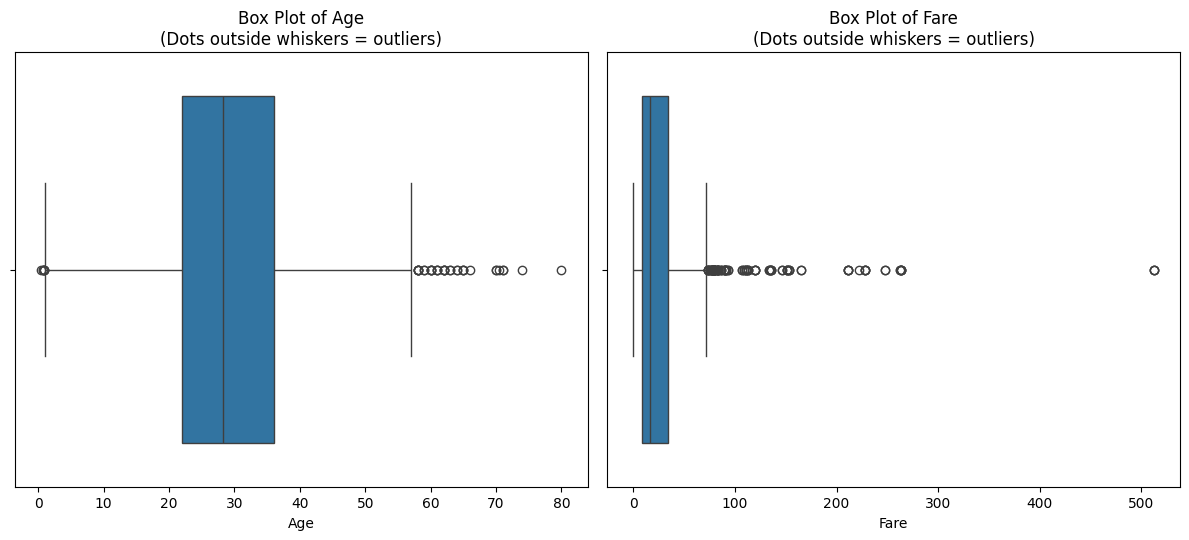

In [13]:
# Create box plots to visualize outliers
plt.figure(figsize=(12, 10))
for i, col in enumerate(numerical_cols, 1):
    if col in data_cleaned.columns:
        plt.subplot(2, 2, i)
        sns.boxplot(x=data_cleaned[col].dropna())
        plt.title(f'Box Plot of {col.title()}\n(Dots outside whiskers = outliers)')
        plt.xlabel(col.title())

plt.tight_layout()
plt.show()

The box plots clearly show the distribution of each variable and highlight outliers. Age outliers appear more realistic. Fare shows the most extreme outliers, with some tickets costing more than typical fares.

Each requires a different handling strategy based on domain knowledge about the Titanic.


**Common Strategies for Handling Outliers:**

Different situations call for different approaches such as:

- **Remove them entirely**: If they're clearly errors or irrelevant to our analysis
- **Cap or limit their values**: Set a maximum/minimum threshold to reduce their impact  
- **Analyze them separately**: If they represent meaningful but rare events

**Applying Outlier Handling Strategies**

Now let's make informed decisions about each type of outlier based on *historical context and their significance*.

- **Age Outliers:** These represent natural variation and not data errors. So we want to keep these as elderly passengers (60+ years) were realistically aboard the Titanic and are meaningful outliers that tell important stories about the passengers.
- **Fare Outliers:** We want to cap these at the upper bound to prevent extreme fare values from distorting our analysis.

In [14]:
# Fare outliers - Cap extreme values to reduce distortion
data_cleaned['fare'] = data_cleaned['fare'].apply(lambda x: upper if x > upper else (lower if x < lower else x))

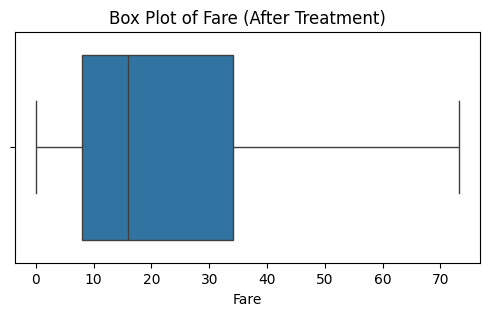

In [15]:
# Visualizing 'Fare' outliers after treatment
plt.figure(figsize=(6, 3))
sns.boxplot(x=data_cleaned['fare'])
plt.title('Box Plot of Fare (After Treatment)')
plt.xlabel('Fare')
plt.show()

## 5. Data Analysis: *Discovering Hidden Patterns*
Now that our data is clean, it's time for the exciting part: *discovering the hidden stories in our data*. This is where we become data detectives, looking for relationships, patterns, and insights often using visualization techniques.

**Univariate Analysis** looks at one variable at a time to understand its individual characteristics such as its distribution and central tendency.

Let's visualize the distribution of our key numerical variables:

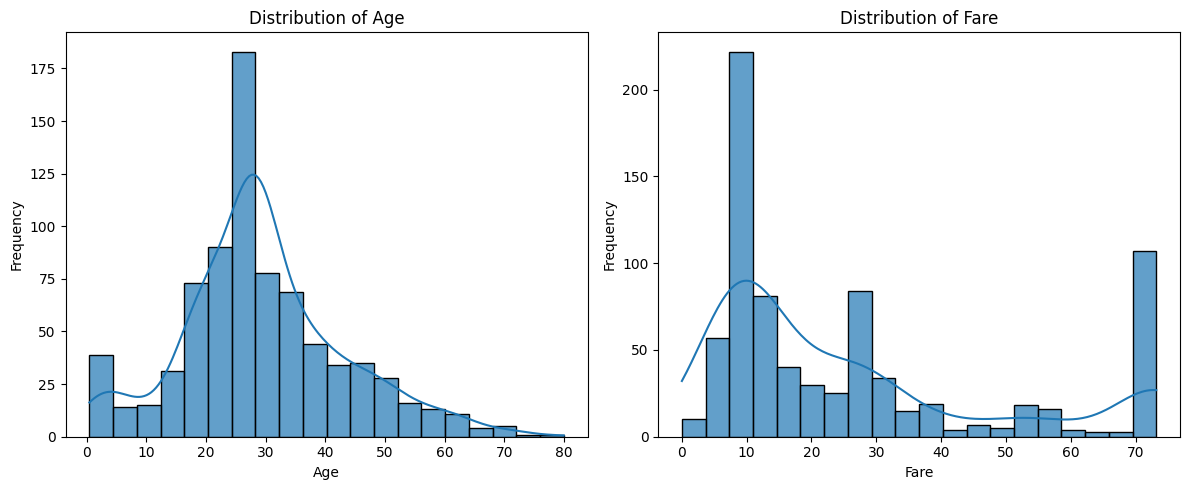

In [16]:
# Analyzing numerical variables distribution
numerical_cols = ['age', 'fare']

plt.figure(figsize=(12, 5))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, 2, i)
    sns.histplot(data_cleaned[col], bins=20, kde=True, edgecolor='black', alpha=0.7)
    plt.title(f'Distribution of {col.title()}')
    plt.xlabel(col.title())
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

From these histograms, we can observe:

- **Age distribution** is somewhat normally distributed with most passengers between 20-40 years old
- **Fare distribution** shows most passengers paid lower fares, with fewer passengers in higher fare categories after our outlier treatment

Let's visualize the distribution of our key categorical variables:

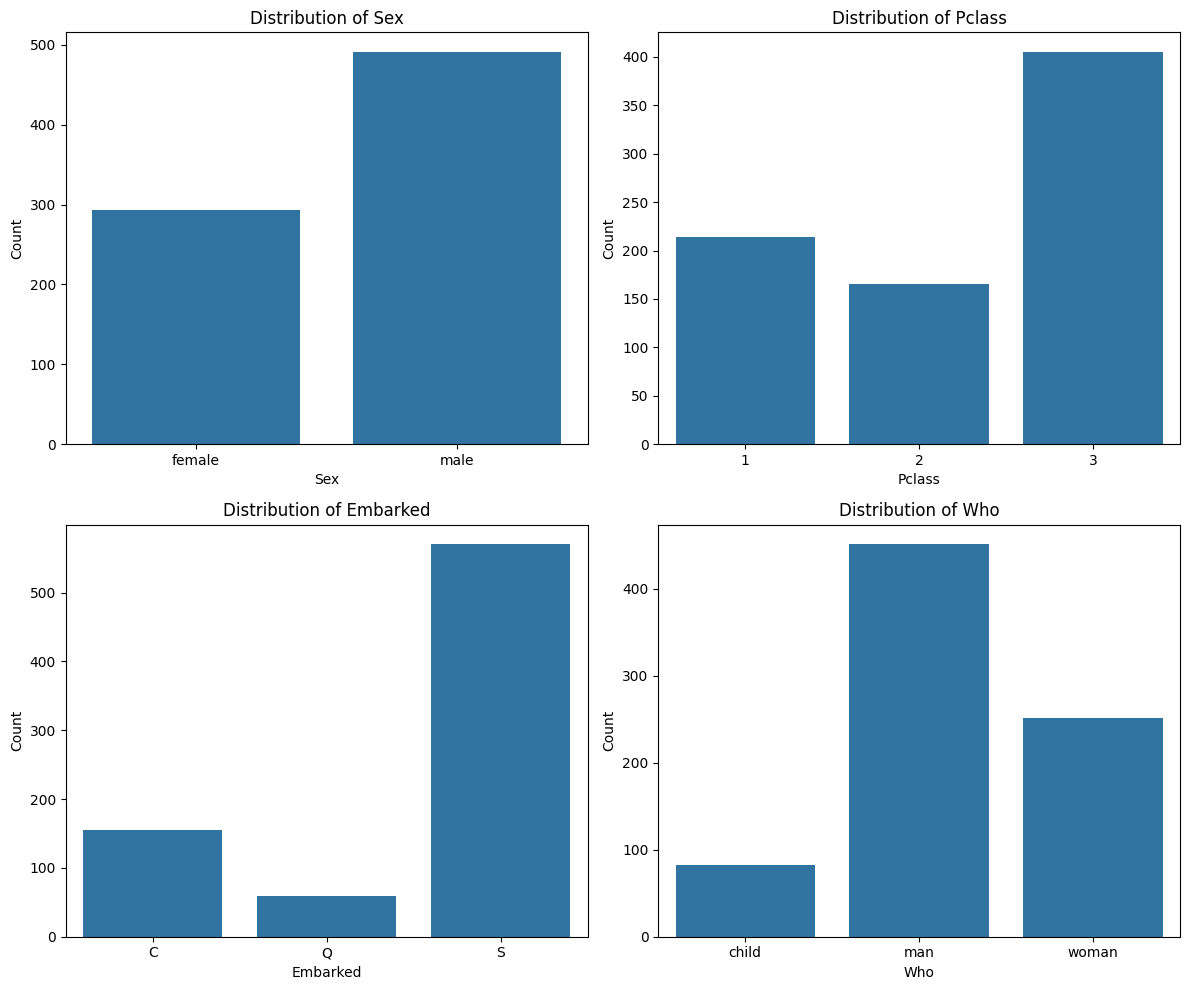

In [17]:
# Analyzing categorical variables
categorical_cols = ['sex', 'pclass', 'embarked', 'who']

plt.figure(figsize=(12, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=col, data=data_cleaned)
    plt.title(f'Distribution of {col.title()}')
    plt.xlabel(col.title())
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

From these distribution plots, we can observe several important patterns:

- **Gender:** There are more male passengers than female
- **Passenger Class:** Majority traveled in 2nd and 3rd class, with 3rd class being the most common
- **Embarkation Port:** Southampton (S) was by far the most popular boarding location, followed by Cherbourg (C) and Queenstown (Q)
- **Who:** Adult men formed the largest group, followed by women and children

**Bivariate Analysis** helps us examine relationships between two variables, particularly focusing on how different factors relate to target variable.

Now we'll investigate how different factors relate to our target variable - survival. We'll create survival rate charts for each categorical variable to identify patterns that might not be immediately obvious from the raw data.

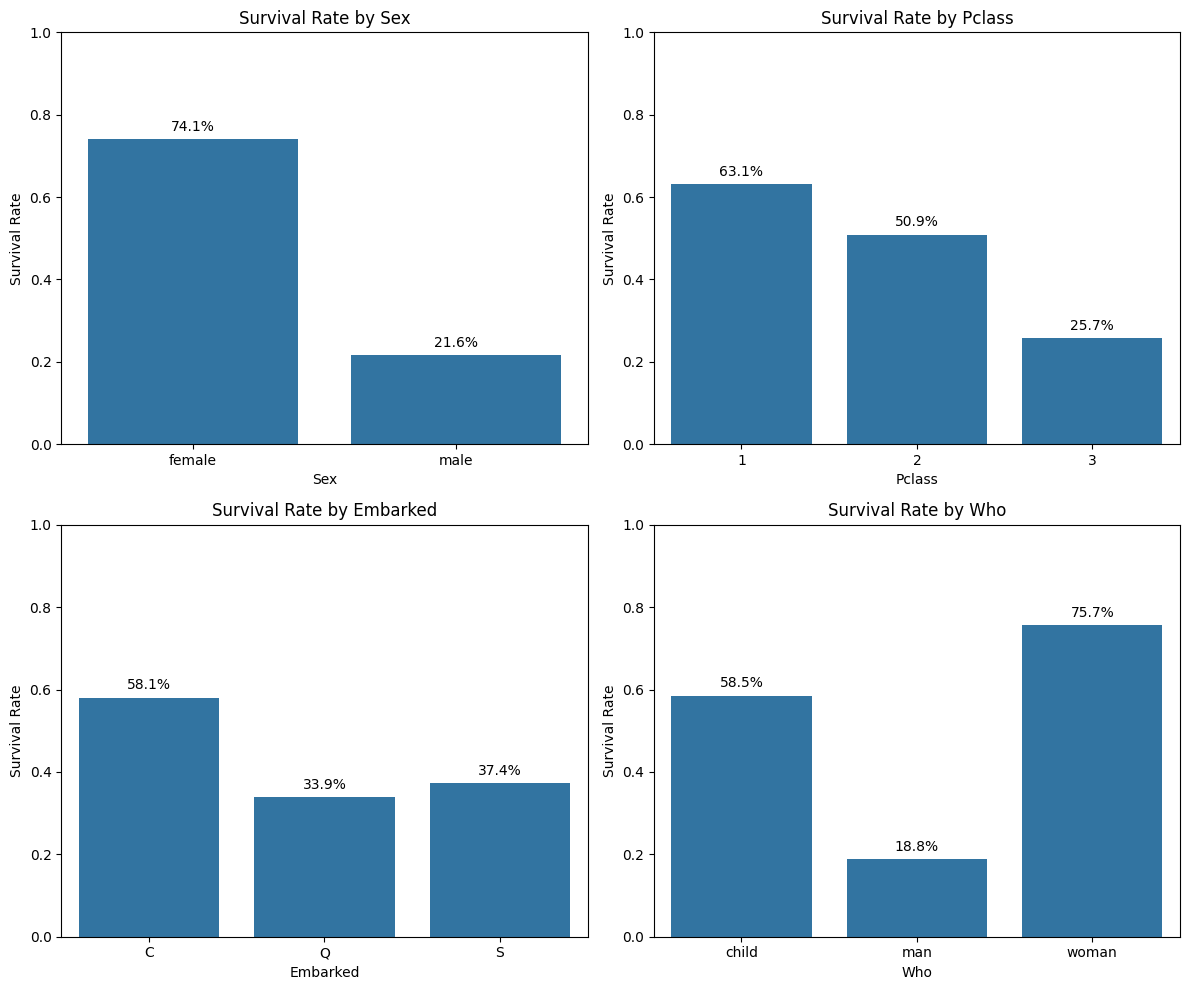

In [18]:
# Survival rate by different categorical variables
plt.figure(figsize=(12, 10))

categorical_cols = ['sex', 'pclass', 'embarked', 'who']
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 2, i)
    sns.barplot(data=data_cleaned, x=col, y='survived', errorbar=None)
    plt.title(f'Survival Rate by {col.title()}')
    plt.xlabel(col.title())
    plt.ylabel('Survival Rate')
    plt.ylim(0, 1)

    # Add percentage labels on bars
    survival_by_category = data_cleaned.groupby(col, observed=True)['survived'].mean()
    for j, v in enumerate(survival_by_category.values):
        plt.text(j, v + 0.02, f'{v:.1%}', ha='center')

plt.tight_layout()
plt.show()

These survival rate charts reveal critical insights:

- **Gender had the strongest impact:** Women had much higher survival rates (\~74%) compared to men (~21%)
- **Class mattered significantly:** 1st class passengers had the highest survival rate (\~63%), while 3rd class had the lowest (~26%)
- **Embarkation port showed differences:** Passengers from Cherbourg (C) had higher survival rates
- **Age category impact:** Children had higher survival rates than adult men

**Multivariate Analysis** helps us examine relationships among multiple variables simultaneously using heatmaps and pairplots.

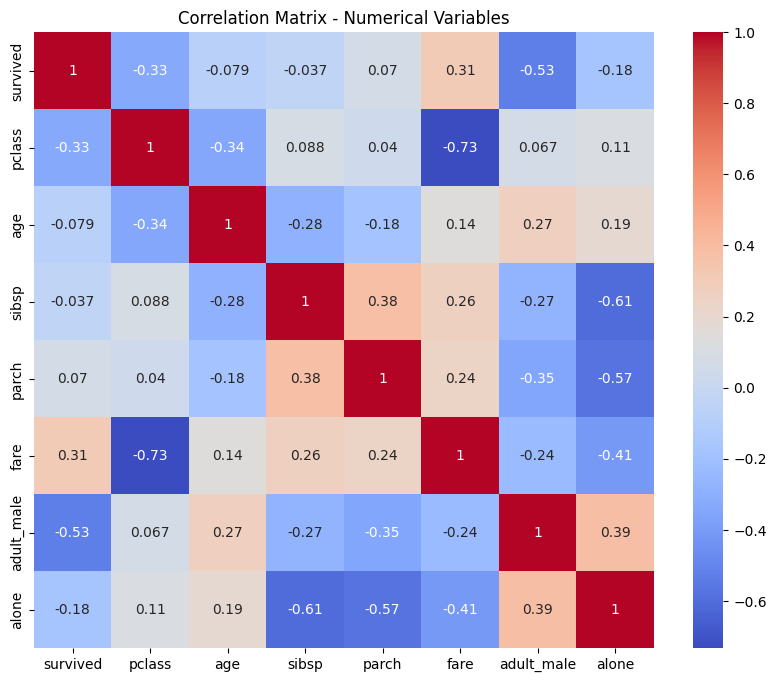

In [19]:
# Correlation analysis for numerical variables
numerical_cols = data_cleaned.select_dtypes(include=[np.number])
correlation_matrix = numerical_cols.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix - Numerical Variables')
plt.show()

Key correlations with survival:

- **Negative correlation with adult_male (-0.53):**
- **Negative correlation with pclass (-0.33):** Lower class numbers (1st class) associated with higher survival
- **Positive correlation with fare (0.31):** Higher fares associated with higher survival
- **Weak correlations with age and family variables:** These factors had less direct impact on survival

<Figure size 1000x800 with 0 Axes>

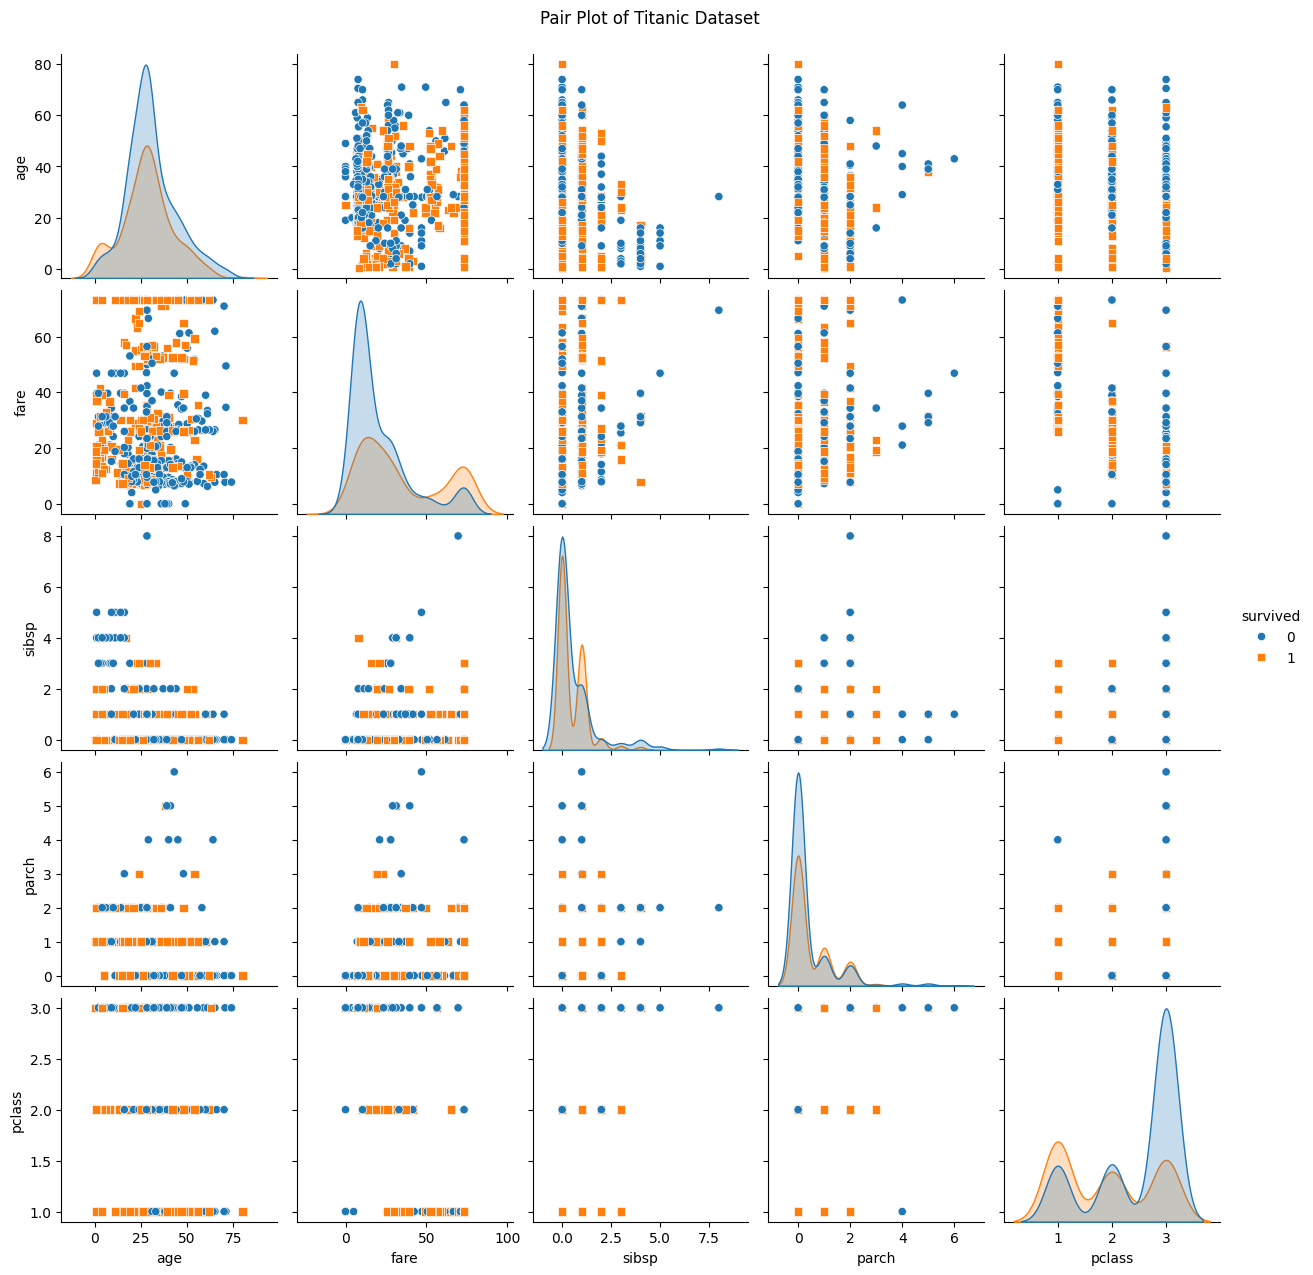

In [20]:
# Pairplot to visualize relationships between variables
# Select key variables for the pairplot
vars_to_plot = ['age', 'fare', 'sibsp', 'parch', 'pclass']

plt.figure(figsize=(10, 8))
sns.pairplot(data_cleaned, vars=vars_to_plot, hue='survived', diag_kind='kde', markers=['o', 's'])
plt.suptitle('Pair Plot of Titanic Dataset', y=1.02)
plt.show()


The pairplot reveals several important relationships between variables:

- **Family Variables (sibsp, parch):** Most passengers traveled with small family groups (0-2 relatives)
- **Class vs Fare:** Clear relationship showing 1st class passengers paid significantly higher fares
- **Survival Patterns:** Orange points (survivors) and blue points (non-survivors) show different clustering patterns, particularly visible in:
  - Lower passenger class numbers (1st class) have more orange points
  - Higher fare ranges show more survival

## 6. Feature Engineering: *Creating Better Variables*

 Feature engineering involves creating new variables or transforming existing ones to help machine learning algorithms understand patterns more effectively and improve its performance. It involves tasks such as feature creation, feature transformation, feature selection and so on.



**Feature Creation:**
Feature creation involves combining existing variables to create new, more informative features that capture important relationships or patterns.

Individual variables like sibsp (siblings/spouses) and parch (parents/children) tell only part of the story. By combining them, we can create a family_size feature that represents the total family group size aboard the ship.

Family Size vs Survival:
family_size
1     0.336
2     0.552
3     0.574
4     0.714
5     0.231
6     0.136
7     0.333
8     0.000
11    0.000
Name: survived, dtype: float64


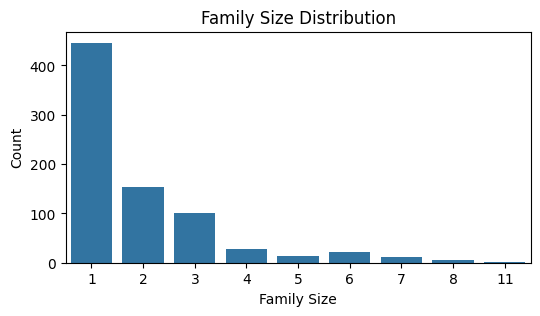

In [21]:
# Family Size: Total family members aboard
# Combine siblings/spouses + parents/children + passenger themselves
data_cleaned['family_size'] = data_cleaned['sibsp'] + data_cleaned['parch'] + 1

print("Family Size vs Survival:")
print(data_cleaned.groupby('family_size')['survived'].mean().round(3))

# Visualizing Family Size Distribution
plt.figure(figsize=(6, 3))
sns.countplot(x='family_size', data=data_cleaned)
plt.title('Family Size Distribution')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.show()

The family size analysis reveals a fascinating pattern:

- **Small families (size=2-3):** ~55-57% survival rate
- **Medium families (size=4):** 71.4% survival rate
- **Large families (size=5+):** Much lower survival rates

This suggests there was an optimal family size of around 2-4 people for survival, with very small and very large groups facing different types of disadvantages.

**Feature Transformation:**
Feature transformation involves modifying existing variables to make them more suitable for machine learning algorithms or to better capture underlying patterns such as *transforming categorical variables*.



Machine learning algorithms typically work with numerical data, so we need to convert our categorical variables into numerical format. One-hot encoding is like creating individual "yes/no" questions for each category:

- Instead of "sex = male/female", we create "sex_male = 0/1"
- Instead of "embarked = C/Q/S", we create separate columns for each port
- This prevents the algorithm from assuming an artificial order between categories

We use `drop_first=True` to avoid redundancy, i.e., if someone is not male, they must be female, so we don't need both columns.

In [22]:
# One-hot encoding for nominal categories
categorical_features = ['sex', 'embarked', 'who']
data_encoded = pd.get_dummies(data_cleaned, columns=categorical_features, drop_first=True, dtype=int)
data_encoded.head()


,survived,pclass,age,sibsp,parch,fare,adult_male,alone,family_size,sex_male,embarked_Q,embarked_S,who_man,who_woman
0,0,3,22.0,1,0,7.2500,1,0,2,1,0,1,1,0
1,1,1,38.0,1,0,71.2833,0,0,2,0,0,0,0,1
2,1,3,26.0,0,0,7.9250,0,1,1,0,0,1,0,1
3,1,1,35.0,1,0,53.1000,0,0,2,0,0,1,0,1
4,0,3,35.0,0,0,8.0500,1,1,1,1,0,1,1,0


All variables are now numerical and ready for machine learning algorithms.

## Key Takeaways

Here are the essential tools and principles to remember:

**The Four-Phase Framework**

1. **Explore:** Always start by understanding the data's basic structure
2. **Clean:** Handle missing values and errors thoughtfully
3. **Analyze:** Look for patterns at univariate, bivariate, and multivariate levels
4. **Engineer:** Create new features that capture discovered patterns

**Best Practices**

**Start Simple, Go Deep** - Begin with basic statistics, gradually explore complex relationships, and always validate findings.

**Visualize Everything** - Use appropriate plots for each data type, create multiple relationship views, and don't rely solely on summary statistics.

**Question Everything** - Ask "why" when you see patterns, investigate unusual findings, and consider business context.

**Document the Findings** - Track insights and decisions, create clear narratives of the exploration.

Remember, EDA isn't just a checklist, it's an investigative mindset that guides the entire data science process. The understanding we gain will be invaluable for building predictive models.